In [22]:
import numpy as np
import matplotlib.pyplot as plt

Let's study a vertically moving body subject to the force of gravity.

If the initial height is h, then the vertical position is given by


y(t) = h - g*t^2/2


while velocity

v(t) = -g*t


The moment the body reaches the ground, denoted as tg, can be found from


y(tg) = 0   -->  tg = sqrt(2h/g).

In [23]:
h = 1    # let's use 1m
g = 9.8  # m/s^2 -- acceleration due to Earth's gravity
m = 1.0  # 1 kg -- mass of the body

tg = np.sqrt(2*h/g)

print("Time to reach ground = " + str(round(tg, 2)) + " seconds")

Time to reach ground = 0.45 seconds


In [24]:
def calc_free_fall_position(t):
  """
  For given time *t* return position.
  """
  return h - g * np.power(t, 2) / 2


def calc_free_fall_velocity(t):
  return -g*t


def calc_free_fall_K(t):
  # Kinetic energy
  v = calc_free_fall_velocity(t)

  return m*np.power(v, 2) / 2


def calc_free_fall_P(t):
  # Potential energy
  q = calc_free_fall_position(t)
  return m*g*q


def calc_free_fall_L(t):
  # Lagrangian (well, Lagrange function)
  K = calc_free_fall_K(t)
  P = calc_free_fall_P(t)

  return K - P


Let's see how the motion of a freely falling object can be represented in configuration space (extended configuration space, to be more precise)

In [25]:
def plot_config_path(q_vs_t, label="label"):
  """
  q_vs_t -- is a *function* of time that we want to plot.
  """
  ts = np.linspace(0, tg, 100)  # study motion from 0 to tg -- when body hits the ground

  qs = q_vs_t(ts)

  plt.figure(figsize=[8, 8])

  plt.plot(qs, ts, 'r-', alpha=0.4, label=label)

  plt.xlabel("position (m)")
  plt.ylabel("time (s)")

  plt.legend(loc="upper right")
  plt.grid(1)

  plt.show()
  plt.close()

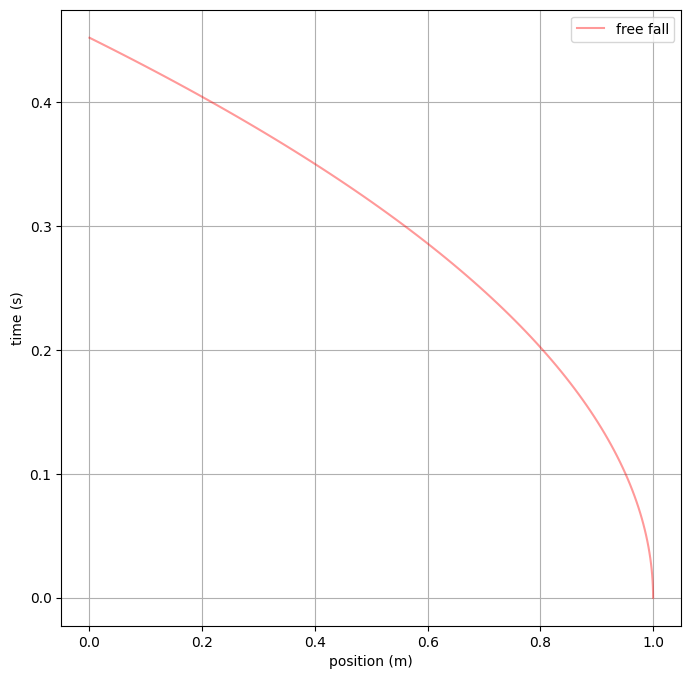

In [26]:
plot_config_path(calc_free_fall_position, label="free fall")

As a *comparison*, let's study another path -- a straight line that connects the initial and final position (0 and h). This path corresponds to a body moving with constant speed *u*. The body starts at t=0 (same as free fall) and reaches the ground at the same time as the freely falling body if

u = h / tg


Thus, we have position and velocity as functions of time


y(t) = h - u * t


v(t) = u

In [27]:
u = h / tg

print("Required constant speed = " + str(round(u, 2)) + " (m/s)")

Required constant speed = 2.21 (m/s)


In [28]:
def calc_uniform_position(t):
  """
  For given time *t* return position.
  """
  return h - u*t


def calc_uniform_velocity(t):
  return -u


def calc_uniform_K(t):
  # Kinetic energy
  v = calc_uniform_velocity(t)

  return m*np.power(v, 2) / 2


def calc_uniform_P(t):
  # Potential energy
  q = calc_uniform_position(t)
  return m*g*q


def calc_uniform_L(t):
  # Lagrangian (well, Lagrange function)
  K = calc_uniform_K(t)
  P = calc_uniform_P(t)

  return K - P


Let's see how uniform motion looks in extended configuration space

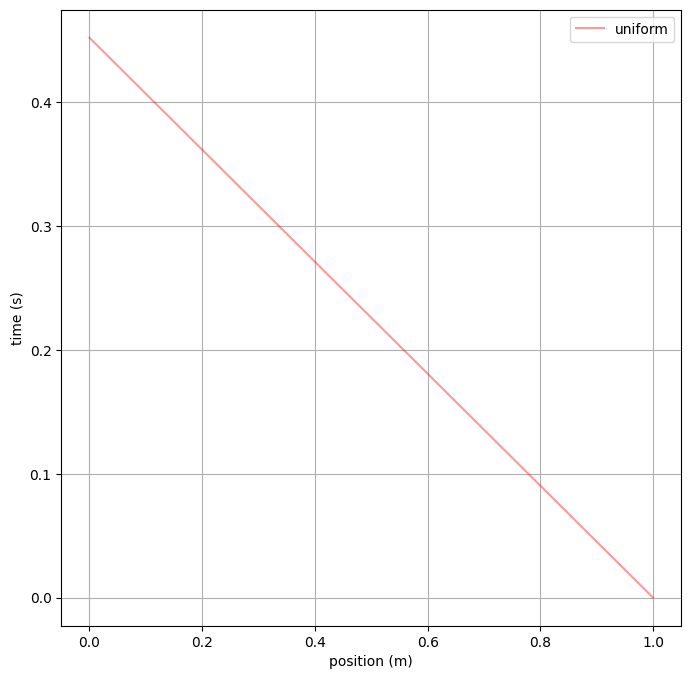

In [29]:
plot_config_path(calc_uniform_position, label="uniform")

Let's explore more paths. An easy way to create many more paths is to do "superposition" of paths:

If q0(t) is a *true* (free fall path) and q1(t) is a uniform path, then we can consider their "superposition" or a combination:


q(a, t) = a*q1(t) + (1-a)*q0(t)


If we vary a from 0 to 1 we can *infinite* number of paths (possible motions). For a = 0 we get

q(0, t) = q0(t)    -- a *true* path


for a = 1 we get


q(1, t) = q1(t) -- a uniform motion path


Velocities also behave this way, as can be straightforwardly calculated using del_t operator.

In [41]:
def calc_position(a, t):
  """
  For given time *t* return position.
  """
  q0 = calc_free_fall_position(t)
  q1 = calc_uniform_position(t)
  return a*q1 + (1-a)*q0


def calc_velocity(a, t):
  v0 = calc_free_fall_velocity(t)
  v1 = calc_uniform_velocity(t)
  return a*v1 + (1-a)*v0


def calc_K(a, t):
  # Kinetic energy
  v = calc_velocity(a, t)

  return m*np.power(v, 2) / 2


def calc_P(a, t):
  # Potential energy
  q = calc_position(a, t)
  return m*g*q


def calc_L(a, t):
  # Lagrangian (well, Lagrange function)
  K = calc_K(a, t)
  P = calc_P(a, t)

  return K - P


Now we need to be able to plot paths for different values of *a*

In [37]:
def plot_config_paths(steps):
  ts = np.linspace(0, tg, 100)  # study motion from 0 to tg -- when body hits the ground

  As = np.linspace(0, 1, steps)

  qs = []

  plt.figure(figsize=[8, 8])

  for a in As:
    q = calc_position(a, ts)
    qs.append(q)  # add to the list of paths
    plt.plot(q, ts, alpha=0.4, label="a="+str(round(a,2)))

  plt.xlabel("position (m)")
  plt.ylabel("time (s)")

  plt.legend(loc="upper right")
  plt.grid(1)

  plt.show()
  plt.close()

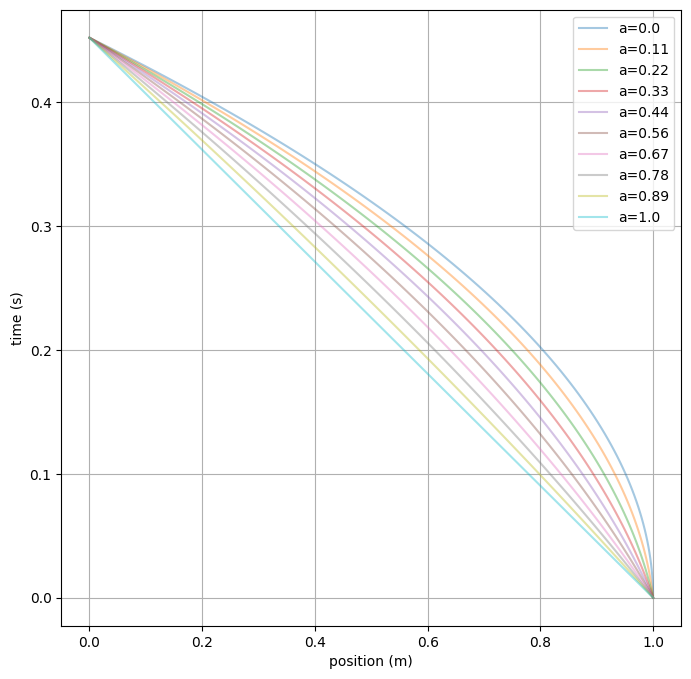

In [38]:
plot_config_paths(10)

Now let us calculate total action for each path. Total action would be the sum of little bits of actions:


A = sum delta_A

and little piece of action is

delta_A = L(t) delta_t


Thus, we need to know Lagrange function for each moment of time and then do the summation of


A = sum (L(t) delta_t)


Once we have actions for all paths corresponding to different values of the "mixing" parameter *a* above, we can plot how total action depends on *a*.


If the least action principle is correct, the path with a=0 must give us the smallest value (least value)

In [46]:
def plot_actions(steps):
  ts = np.linspace(0, tg, 100)  # study motion from 0 to tg -- when body hits the ground
  dt = tg / 100  # we split all motion into 100 steps. Might need to adjust for better accuracy

  As = np.linspace(0, 1, steps)


  Ls = []
  Actions = []

  plt.figure(figsize=[8, 8])

  for a in As:
    L = calc_L(a, ts)  # this is Lagrangian for _all_ moments of time, basically L(t)
    Ls.append(L)
    Action = sum(dt*L)
    Actions.append(Action)

    # let's plot how Lagrangian changes it time for given path
    plt.plot(ts, L, alpha=0.4, label="a="+str(round(a,2)))

  plt.xlabel("time (s)")
  plt.ylabel("Lagrangian (J)")

  plt.legend(loc="upper left")
  plt.grid(1)

  plt.show()
  plt.close()

  # the second figure that shows action vs "mixing parameter" *a*
  plt.figure(figsize=[8, 8])
  plt.plot(As, Actions, 'ro-', alpha=0.4)
  plt.xlabel("a")
  plt.ylabel("Action (J*s)")

  # plt.legend(loc="upper right")
  plt.grid(1)

  plt.show()
  plt.close()

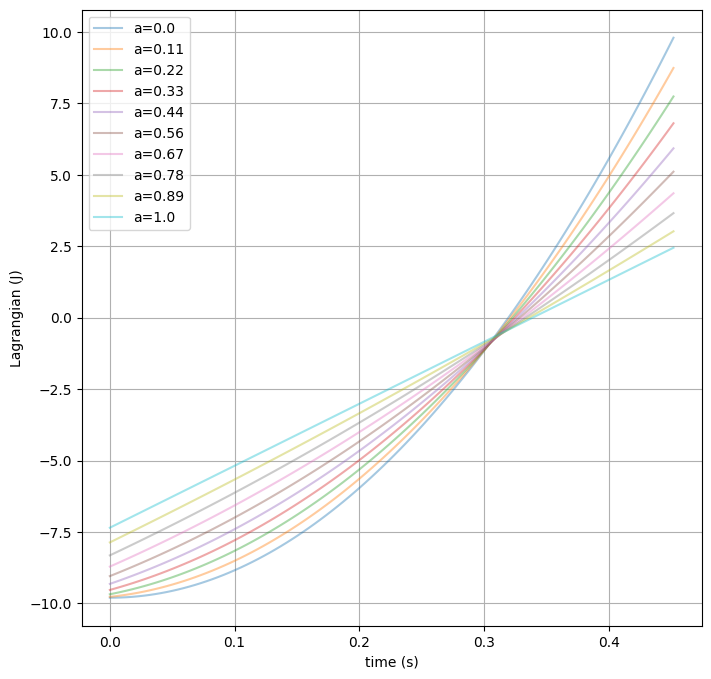

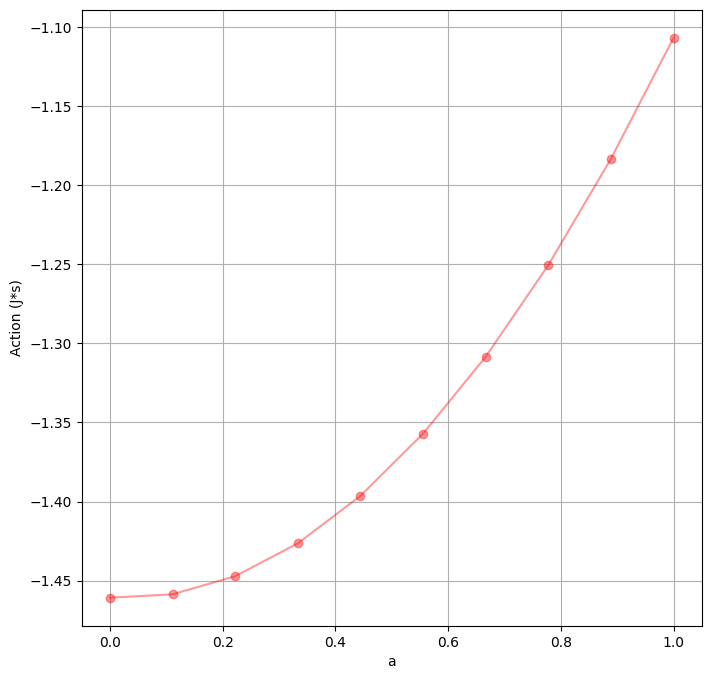

In [47]:
plot_actions(10)